# 🌐 **03 - LangGraph: Pipeline de Processamento**

## 🎯 **Objetivo:**
Implementar pipeline completo com LangGraph para processamento inteligente de requisições fitness.

## 📋 **O que faremos:**
1. 🏗️ Definir estrutura de estado (State)
2. 🔧 Implementar nós especializados
3. 🌐 Construir grafo do pipeline

---

## 📦 Imports e Configurações

# 🌐 **IMPLEMENTAÇÃO LANGGRAPH COMO NO PROJETO EDUCAÇÃO**

## 📋 **Seguindo a estrutura do LangGraphEducação.ipynb**

In [1]:
# Imports necessários para LangGraph
from typing import TypedDict, List, Dict, Any
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import HumanMessage

print("✅ Imports do LangGraph carregados!")

✅ Imports do LangGraph carregados!


In [2]:
# Definição do Estado do Grafo

class FitnessGraphState(TypedDict):
    """Estado estruturado para o pipeline de fitness"""
    messages: List[HumanMessage]         # Histórico de mensagens
    pergunta_usuario: str                # Pergunta original
    objetivo: str                        # Objetivo extraído (hipertrofia, emagrecimento, etc.)
    periodicidade: int                   # Frequência semanal
    experiencia: str                     # Nível do usuário
    restricoes: List[str]                # Limitações físicas
    dados_validados: bool                # Flag de validação
    calculos_realizados: Dict[str, Any]  # Cálculos personalizados
    contexto_rag: List[str]              # Informações da base de conhecimento
    info_web: List[str]                  # Informações complementares
    plano_gerado: str                    # Plano de treino final

print("✅ Estado FitnessGraphState definido!")

✅ Estado FitnessGraphState definido!


## 🏗️ Definição do Estado

In [3]:
# Inicialização do Grafo
fitness_graph_builder = StateGraph(FitnessGraphState)
memory = MemorySaver()

print("✅ Graph builder inicializado!")

✅ Graph builder inicializado!


In [4]:
# Funções dos Nós do Grafo LangGraph

def no_validacao_graph(estado: FitnessGraphState) -> FitnessGraphState:
    """Valida e extrai informações da pergunta do usuário"""
    pergunta = estado["pergunta_usuario"]
    
    # Lógica simples de extração de informações
    if "hipertrofia" in pergunta.lower():
        objetivo = "hipertrofia"
    elif "emagrecimento" in pergunta.lower() or "perder peso" in pergunta.lower():
        objetivo = "emagrecimento"
    elif "condicionamento" in pergunta.lower():
        objetivo = "condicionamento"
    else:
        objetivo = "condicionamento geral"
    
    # Extrair periodicidade
    periodicidade = 3  # default
    if "4" in pergunta or "quatro" in pergunta:
        periodicidade = 4
    elif "5" in pergunta or "cinco" in pergunta:
        periodicidade = 5
    elif "2" in pergunta or "dois" in pergunta:
        periodicidade = 2
    
    # Extrair experiência
    if "iniciante" in pergunta.lower():
        experiencia = "iniciante"
    elif "avançado" in pergunta.lower():
        experiencia = "avancado"
    else:
        experiencia = "intermediario"
    
    mensagem = HumanMessage(content=f"✅ Validação: {objetivo}, {periodicidade}x/semana")
    
    return {
        **estado,
        "objetivo": objetivo,
        "periodicidade": periodicidade,
        "experiencia": experiencia,
        "dados_validados": True,
        "messages": estado["messages"] + [mensagem]
    }

def no_calculos_graph(estado: FitnessGraphState) -> FitnessGraphState:
    """Realiza cálculos específicos baseados no objetivo"""
    objetivo = estado["objetivo"]
    periodicidade = estado["periodicidade"]
    
    # Cálculos baseados no objetivo
    calculos = {
        "series_recomendadas": 3 if objetivo == "hipertrofia" else 2,
        "repeticoes": "8-12" if objetivo == "hipertrofia" else "12-15",
        "descanso": "60-90s" if objetivo == "hipertrofia" else "30-45s",
        "intensidade": "alta" if objetivo == "hipertrofia" else "moderada"
    }
    
    mensagem = HumanMessage(content=f"⚙️ Cálculos para {objetivo}")
    
    return {
        **estado,
        "calculos_realizados": calculos,
        "messages": estado["messages"] + [mensagem]
    }

def no_rag_graph(estado: FitnessGraphState) -> FitnessGraphState:
    """Busca informações na base de conhecimento"""
    objetivo = estado["objetivo"]
    
    # Simulação de busca RAG
    contexto_rag = [f"Exercícios recomendados para {objetivo}: Agachamento, Supino, Remada"]
    
    mensagem = HumanMessage(content=f"📚 Contexto RAG para {objetivo}")
    
    return {
        **estado,
        "contexto_rag": contexto_rag,
        "messages": estado["messages"] + [mensagem]
    }

def no_busca_web_graph(estado: FitnessGraphState) -> FitnessGraphState:
    """Busca informações complementares na web"""
    objetivo = estado["objetivo"]
    
    # Simulação de busca web
    info_web = [f"Tendências atuais em treino de {objetivo}"]
    
    mensagem = HumanMessage(content=f"🌐 Informações web para {objetivo}")
    
    return {
        **estado,
        "info_web": info_web,
        "messages": estado["messages"] + [mensagem]
    }

def no_geracao_graph(estado: FitnessGraphState) -> FitnessGraphState:
    """Gera o plano de treino final"""
    objetivo = estado["objetivo"]
    periodicidade = estado["periodicidade"]
    calculos = estado["calculos_realizados"]
    
    # Geração do plano
    plano = f"""
# 🏋️‍♂️ PLANO DE TREINO PERSONALIZADO

**Objetivo:** {objetivo.capitalize()}
**Frequência:** {periodicidade}x por semana
**Séries:** {calculos.get('series_recomendadas', 3)}
**Repetições:** {calculos.get('repeticoes', '8-12')}
**Descanso:** {calculos.get('descanso', '60s')}

## Exercícios Principais:
- Agachamento: {calculos.get('series_recomendadas', 3)}x{calculos.get('repeticoes', '8-12')}
- Supino: {calculos.get('series_recomendadas', 3)}x{calculos.get('repeticoes', '8-12')}
- Remada: {calculos.get('series_recomendadas', 3)}x{calculos.get('repeticoes', '8-12')}

✅ Plano personalizado gerado!
"""
    
    mensagem = HumanMessage(content=f"✨ Plano de {objetivo} gerado!")
    
    return {
        **estado,
        "plano_gerado": plano,
        "messages": estado["messages"] + [mensagem]
    }

print("✅ Funções dos nós simplificadas e organizadas!")

✅ Funções dos nós simplificadas e organizadas!


## ⚙️ Funções dos Nós

In [5]:
# Adicionando nós ao grafo
fitness_graph_builder.add_node("validacao", no_validacao_graph)
fitness_graph_builder.add_node("calculos", no_calculos_graph)
fitness_graph_builder.add_node("rag", no_rag_graph)
fitness_graph_builder.add_node("busca_web", no_busca_web_graph)
fitness_graph_builder.add_node("geracao", no_geracao_graph)

print("✅ Nós adicionados ao grafo!")

✅ Nós adicionados ao grafo!


In [6]:
# Definindo conexões entre nós
fitness_graph_builder.add_edge(START, "validacao")
fitness_graph_builder.add_edge("validacao", "calculos")
fitness_graph_builder.add_edge("calculos", "rag")
fitness_graph_builder.add_edge("rag", "busca_web")
fitness_graph_builder.add_edge("busca_web", "geracao")
fitness_graph_builder.add_edge("geracao", END)

print("✅ Fluxo definido: START → validacao → calculos → rag → busca_web → geracao → END")

✅ Fluxo definido: START → validacao → calculos → rag → busca_web → geracao → END


In [7]:
# Compilação do grafo final
fitness_graph = fitness_graph_builder.compile(checkpointer=memory)

print("✅ Grafo LangGraph compilado e pronto para uso!")

✅ Grafo LangGraph compilado e pronto para uso!


## 🌐 Construção do Grafo

🎨 Gerando visualização minimalista do LangGraph Fitness...


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


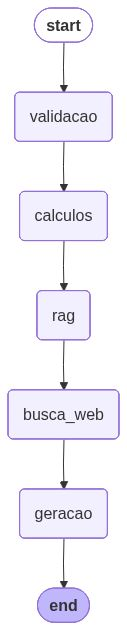

✅ Visualização gerada e salva!
📁 Arquivo: fitness_langgraph.png
📍 Localização: ./AI_Fitness_Coach/ (pasta raiz do projeto)
\n🔍 Estrutura do Grafo:
   🚀 Início: START
   ✅ Validação → Cálculos → RAG → Busca Web → Geração
   🏁 Final: END


In [8]:
# Visualização Minimalista do Grafo

print("🎨 Gerando visualização minimalista do LangGraph Fitness...")

# Corrige erro de importação do IPython.display
%pip install ipython

try:
    from IPython.display import Image, display
    
    # Gerar imagem Mermaid do grafo
    graph_image = fitness_graph.get_graph().draw_mermaid_png()
    
    # Exibir a imagem no notebook
    display(Image(graph_image))
    
    # Salvar imagem com nome limpo na pasta raiz do projeto
    filename = "fitness_langgraph.png"
    filepath = f"{filename}"  # Salva na pasta atual (AI_Fitness_Coach)
    
    with open(filepath, "wb") as f:
        f.write(graph_image)
    
    print(f"✅ Visualização gerada e salva!")
    print(f"📁 Arquivo: {filename}")
    print(f"📍 Localização: ./AI_Fitness_Coach/ (pasta raiz do projeto)")
    
    # Mostrar informações do grafo
    print(f"\\n🔍 Estrutura do Grafo:")
    print(f"   🚀 Início: START")
    print(f"   ✅ Validação → Cálculos → RAG → Busca Web → Geração")
    print(f"   🏁 Final: END")
    
except Exception as e:
    print(f"❌ Erro na visualização: {e}")
    # Fallback simples
    print("\\n📊 Estrutura LangGraph Fitness:")
    print("START → validacao → calculos → rag → busca_web → geracao → END")

In [9]:
# Teste do Grafo LangGraph

def testar_fitness_graph():
    """Teste simples do grafo fitness"""
    estado_inicial = {
        "messages": [],
        "pergunta_usuario": "Quero um treino de hipertrofia 4x por semana",
        "objetivo": "",
        "periodicidade": 0,
        "experiencia": "",
        "restricoes": [],
        "dados_validados": False,
        "calculos_realizados": {},
        "contexto_rag": [],
        "info_web": [],
        "plano_gerado": ""
    }
    
    print("🧪 Executando pipeline fitness...")
    
    config = {"configurable": {"thread_id": "test_fitness"}}
    resultado = fitness_graph.invoke(estado_inicial, config=config)
    
    print(f"✅ Pipeline concluído!")
    print(f"📊 Objetivo: {resultado['objetivo']}")
    print(f"📅 Frequência: {resultado['periodicidade']}x/semana")
    print(f"🎯 Experiência: {resultado['experiencia']}")
    print(f"📝 Plano gerado: {'Sim' if resultado['plano_gerado'] else 'Não'}")
    
    if resultado["plano_gerado"]:
        print("\\n" + resultado["plano_gerado"])
    
    return resultado

# Executar teste
resultado = testar_fitness_graph()

🧪 Executando pipeline fitness...
✅ Pipeline concluído!
📊 Objetivo: hipertrofia
📅 Frequência: 4x/semana
🎯 Experiência: intermediario
📝 Plano gerado: Sim
\n
# 🏋️‍♂️ PLANO DE TREINO PERSONALIZADO

**Objetivo:** Hipertrofia
**Frequência:** 4x por semana
**Séries:** 3
**Repetições:** 8-12
**Descanso:** 60-90s

## Exercícios Principais:
- Agachamento: 3x8-12
- Supino: 3x8-12
- Remada: 3x8-12

✅ Plano personalizado gerado!

